In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import seaborn as sns
import re
import yfinance as yf

In [2]:
forex=pd.read_table("https://vincentarelbundock.github.io/Rdatasets/csv/AER/MarkDollar.csv",sep=',')
forex2=pd.read_table("https://vincentarelbundock.github.io/Rdatasets/csv/AER/MarkPound.csv",sep=',').head(len(forex))

In [3]:
forex.drop('rownames',axis=1,inplace=True)

In [4]:
forex2.drop('rownames',axis=1,inplace=True)
forex.set_index('time',inplace=True)
forex2=forex2.groupby((forex2.index/10).round(0)).mean()
forex=forex.groupby((forex.index/10).round(0)).mean()

Text(0, 0.5, 'value')

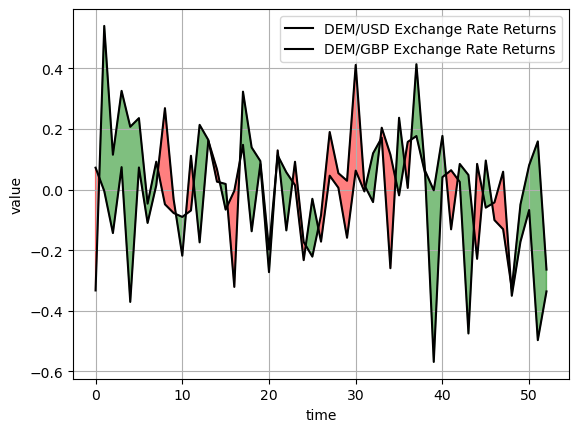

In [5]:
plt.plot(forex.index,forex['value'],label='DEM/USD Exchange Rate Returns',color='black')
plt.plot(forex2.index,forex2['value'],label='DEM/GBP Exchange Rate Returns',color='black')

plt.fill_between(forex.index,forex['value'],forex2['value'],where=(forex['value']>forex2['value']),interpolate=True,color='green',alpha=0.5)

plt.fill_between(forex.index,forex['value'],forex2['value'],where=(forex['value']<=forex2['value']),interpolate=True,color='red',alpha=0.5)
    
plt.legend()
plt.grid(True)
plt.xlabel('time')
plt.ylabel('value')


In [10]:
table=pd.read_table("https://vincentarelbundock.github.io/Rdatasets/csv/AER/CPSSW8.csv",sep=',')
table.head()

,rownames,earnings,gender,age,region,education
0,1,20.673077,male,31,South,14
1,2,24.278847,male,50,South,12
2,3,10.149572,male,36,South,12
3,4,8.894231,female,33,South,10
4,5,6.410256,female,56,South,10


In [11]:
bins=[20,30,40,50,60,70]

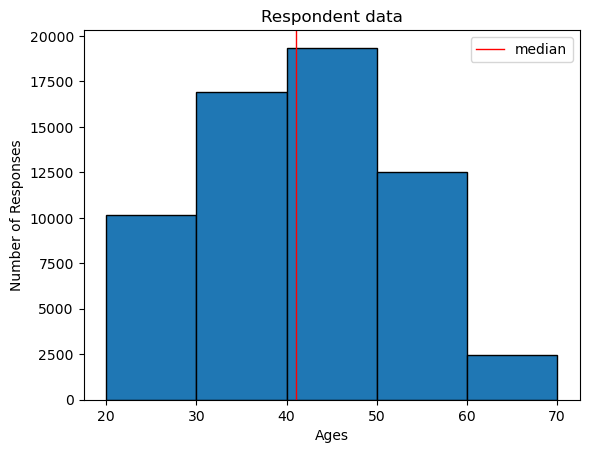

In [22]:
plt.hist(table['age'],bins,edgecolor='black')
median=table['age'].median()
plt.xlabel('Ages')
plt.ylabel('Number of Responses')
plt.title('Respondent data')
plt.axvline(median,color='red',linewidth=1,label='median')
plt.legend()

In [17]:
Cigs=pd.read_table('https://vincentarelbundock.github.io/Rdatasets/csv/AER/CigarettesB.csv',sep=',').rename(columns={'rownames':'state'}).set_index('state')

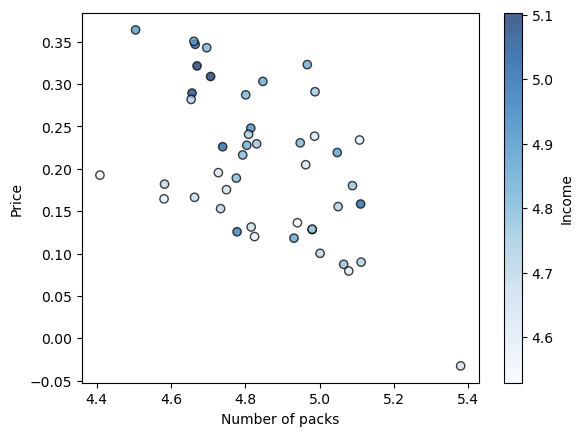

In [23]:
plt.scatter(Cigs['packs'],Cigs['price'],c=Cigs['income'],cmap='Blues',edgecolor='black',linewidth=1,alpha=0.75)
plt.xlabel('Number of packs')
plt.ylabel('Price')
colorbar=plt.colorbar()
colorbar.set_label('Income')

In [27]:
table2=pd.read_table('https://vincentarelbundock.github.io/Rdatasets/csv/AER/CPSSW04.csv',sep=',').drop('rownames',axis=1)

In [28]:
table2.head()

,earnings,degree,gender,age
0,34.61538,bachelor,male,30
1,19.23077,bachelor,female,30
2,13.73626,highschool,female,30
3,19.23077,bachelor,female,30
4,19.23077,bachelor,male,25


In [31]:
table2=table2.groupby(['degree','gender','age'])['earnings'].mean()

b_fem=table2[('bachelor','female')]
b_male=table2[('bachelor','male')]
high_male=table2[('highschool','male')]
high_fem=table2[('highschool','female')]

Text(0.5, 0.98, 'Earnings over Age')

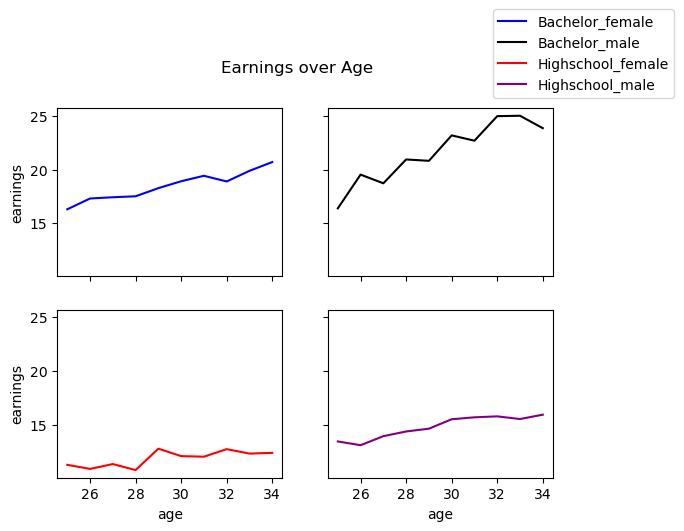

In [89]:
fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True)
ax1.plot(b_fem.index,b_fem,label='Bachelor_female',color='blue')
ax1.set_ylabel('earnings')
ax2.plot(b_male.index,b_male,label='Bachelor_male',color='black')
ax3.plot(high_fem.index,high_fem,label='Highschool_female',color='red')
ax3.set_xlabel('age')
ax3.set_ylabel('earnings')

ax4.plot(high_male.index,high_male,label='Highschool_male',color='purple')
ax4.set_xlabel('age')

fig.legend(bbox_to_anchor=(1.1,1.1))

plt.suptitle('Earnings over Age')

In [35]:
dow_jones=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/stevedata/DJIA.csv',parse_dates=['date']).drop('rownames',axis=1).set_index('date')
average=dow_jones.mean(axis=None)

In [36]:
dow_jones=dow_jones.resample('YE').mean()

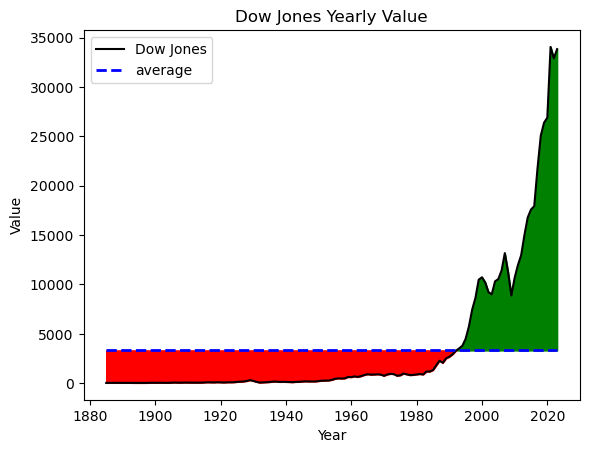

In [39]:
fig,ax=plt.subplots()
ax.set_title('Dow Jones Yearly Value')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

ax.plot(dow_jones.index.year,dow_jones['value'],label='Dow Jones',color='black')
ax.hlines(average,dow_jones.index[0].year,dow_jones.index[-1].year,label='average',color='blue',linestyle='dashed',linewidth=2)
ax.fill_between(dow_jones.index.year,dow_jones['value'],average,where=(dow_jones['value']>average),color='green',interpolate=True)
ax.fill_between(dow_jones.index.year,average,dow_jones['value'],where=(dow_jones['value']<=average),color='red',interpolate=True)

ax.legend()

In [59]:
CPI=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/ArgentinaCPI.csv').drop('rownames',axis=1)
CPI.head()

,time,value
0,1970.00,1.01
1,1970.25,1.06
2,1970.50,1.13
3,1970.75,1.24
4,1971.00,1.33


In [61]:
CPI['time']=pd.to_datetime(np.floor(CPI['time']),format='%Y')
CPI=CPI.groupby(CPI['time'].dt.year).mean().drop('time',axis=1)

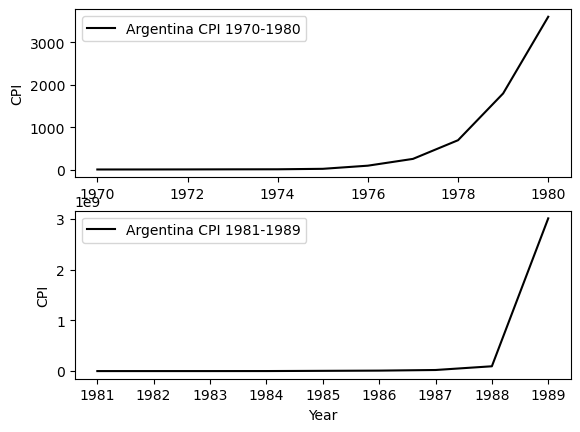

In [63]:
fig,[ax1,ax2]=plt.subplots(nrows=2,ncols=1,sharex=False)
ax1.plot(CPI.index[0:11],CPI.loc[1970:1980],label='Argentina CPI 1970-1980',color='black')
ax2.plot(CPI.index[11:20],CPI.loc[1981:1989],label='Argentina CPI 1981-1989',color='black')

ax1.set_ylabel('CPI')
ax2.set_xlabel('Year')
ax2.set_ylabel('CPI')

ax1.legend()
ax2.legend()

In [73]:
mock=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/betareg/MockJurors.csv').drop('rownames',axis=1)

In [75]:
mock=mock.groupby(['verdict','conflict']).mean()
mock=mock.unstack('verdict')

In [77]:
three_no=mock.iloc[0,0]
three_yes=mock.iloc[1,0]
two_no=mock.iloc[0,1]
two_yes=mock.iloc[1,1]

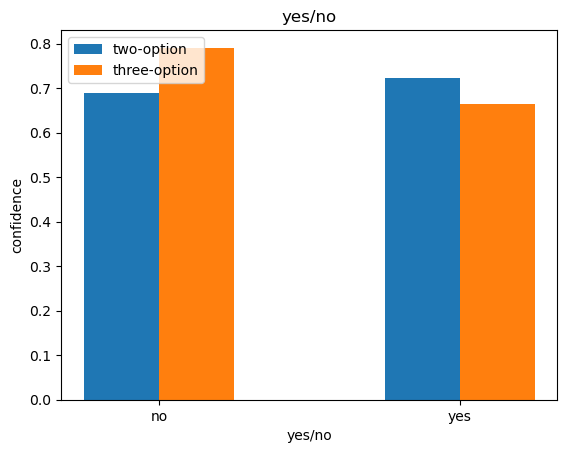

In [81]:
x_values=np.arange(len(mock))
width=0.25

plt.bar(x_values,[two_no,two_yes],label='two-option',width=width)
plt.bar(x_values+width,[three_no,three_yes],label='three-option',width=width)
plt.xlabel('yes/no')
plt.ylabel('confidence')
plt.title('yes/no')
plt.xticks(x_values+width/2,['no','yes'])
plt.legend(loc='upper left')


In [85]:
greenhouse=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/greenhouse_gases.csv').drop('rownames',axis=1).set_index('year')

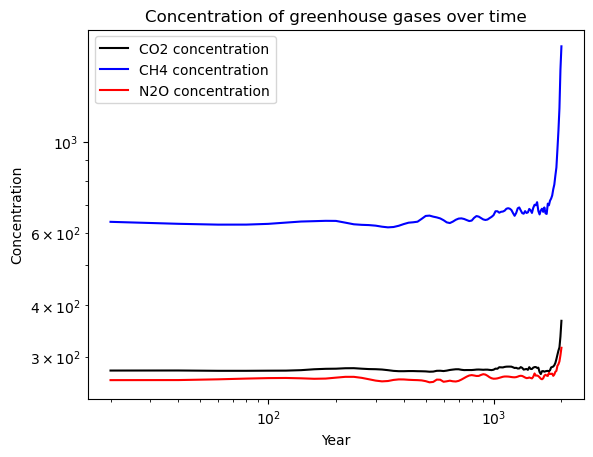

In [86]:
CO2=greenhouse[greenhouse['gas']=='CO2']
CH4=greenhouse[greenhouse['gas']=='CH4']
N2O=greenhouse[greenhouse['gas']=='N2O']

plt.plot(greenhouse.index[0:100],CO2['concentration'],label='CO2 concentration',color='black')
plt.plot(greenhouse.index[100:200],CH4['concentration'],label='CH4 concentration',color='blue')
plt.plot(greenhouse.index[200:300],N2O['concentration'],label='N2O concentration',color='red')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Year')
plt.ylabel('Concentration')
plt.title('Concentration of greenhouse gases over time')
plt.legend()

In [13]:
Salaries=pd.read_table('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv',sep=',').drop('rownames',axis=1).groupby(['rank','sex'])['salary'].mean()

In [15]:
Salaries=pd.DataFrame(Salaries.reset_index())

In [17]:
Salaries=Salaries.pivot(index='rank',columns='sex',values='salary')
Salaries

sex,Female,Male
rank,,
AssocProf,88512.800000,94869.703704
AsstProf,78049.909091,81311.464286
Prof,121967.611111,127120.822581


<Axes: xlabel='sex', ylabel='rank'>

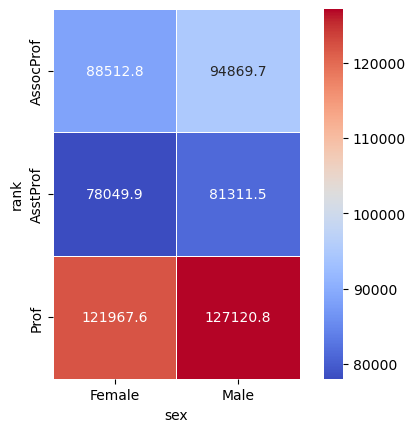

In [23]:
sns.heatmap(Salaries, annot=True, fmt='.1f', square=True, cmap='coolwarm', linewidths=.5)

In [102]:
PSID=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/PSID1982.csv').drop('rownames',axis=1)

In [103]:
P=PSID.groupby(['occupation','gender'])['wage'].mean().round(2)
array=np.arange(2)
width=0.25

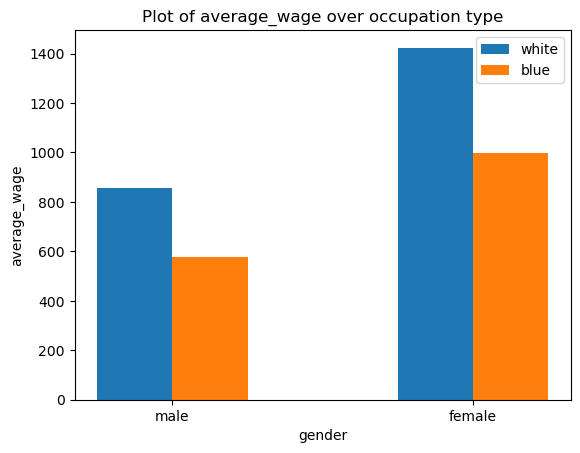

In [106]:
plt.bar(array-width/2,P.loc['white'],width=0.25,label='white')
plt.bar(array+width/2,P.loc['blue'],width=0.25,label='blue')
plt.xticks(array,PSID['gender'].unique())
plt.xlabel('gender')
plt.ylabel('average_wage')
plt.title('Plot of average_wage over occupation type')
plt.legend()